In [1]:
import requests
import re
from lxml import etree
import csv
from fake_useragent import UserAgent
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
url = 'https://search.jd.com/Search?keyword=%E7%AC%94%E8%AE%B0%E6%9C%AC%E7%94%B5%E8%84%91&qrst=1&suggest=1.def.0.SAK7%7CMIXTAG_SAK7R%2CSAK7_M_AM_L5381%2CSAK7_S_AM_R%2CSAK7_D_HSP_R%2CSAK7_SC_PD_R%2CSAK7_SM_PB_R%2CSAK7_SM_PRK_R%2CSAK7_SM_PRC_R%2CSAK7_SM_PRR_R%2CSAK7_SS_PM_R%7C&wq=%E7%AC%94%E8%AE%B0%E6%9C%AC%E7%94%B5%E8%84%91&shop=1&pvid=9682685401bf42fa81d3d8fe09e1b0d7&click=1'

header = {
    "user-agent": UserAgent().random
}

In [3]:
m1 = []
m2 = []
m3 = []
for page in range(0,150):
    url = 'https://api.m.jd.com/?appid=item-v3&functionId=pc_club_skuProductPageComments&client=pc&clientVersion=1.0.0&t=1688298511367&loginType=3&uuid=122270672.16823398645531900979955.1682339865.1688294307.1688298484.20&productId=10052098062889&score=0&sortType=5&page={}&pageSize=10&isShadowSku=0&rid=0&fold=1&bbtf=&shield='.format(page) 
    response = requests.get(url, headers=header) 
    data = response.text 
    data_json = json.loads(data)
    # 提取评论内容和创建时间
    comments = data_json["comments"]
    for comment in comments:
        creationTime = comment["creationTime"]
        m1.append(creationTime)
        productColor = comment["productColor"]
        m2.append(productColor)
        productSize = comment["productSize"]
        m3.append(productSize)


([<matplotlib.axis.XTick at 0x1ab7f5c0d30>,
 [Text(0, 0, '01-02'),
  Text(6, 0, '01-13'),
  Text(12, 0, '01-22'),
  Text(18, 0, '01-30'),
  Text(24, 0, '02-05'),
  Text(30, 0, '02-11'),
  Text(36, 0, '02-18'),
  Text(42, 0, '02-24'),
  Text(48, 0, '03-02'),
  Text(54, 0, '03-08'),
  Text(60, 0, '03-14'),
  Text(66, 0, '03-20'),
  Text(72, 0, '03-26'),
  Text(78, 0, '04-01'),
  Text(84, 0, '04-12'),
  Text(90, 0, '04-21'),
  Text(96, 0, '04-28'),
  Text(102, 0, '05-06'),
  Text(108, 0, '05-15'),
  Text(114, 0, '05-22'),
  Text(120, 0, '05-28'),
  Text(126, 0, '06-04'),
  Text(132, 0, '06-10'),
  Text(138, 0, '06-16'),
  Text(144, 0, '06-22'),
  Text(150, 0, '06-28'),
  Text(156, 0, '07-04'),
  Text(162, 0, '07-10'),
  Text(168, 0, '07-16'),
  Text(174, 0, '07-23'),
  Text(180, 0, '07-29'),
  Text(186, 0, '08-04'),
  Text(192, 0, '08-15'),
  Text(198, 0, '08-21'),
  Text(204, 0, '09-03'),
  Text(210, 0, '09-09'),
  Text(216, 0, '09-16'),
  Text(222, 0, '09-23'),
  Text(228, 0, '09-29'),


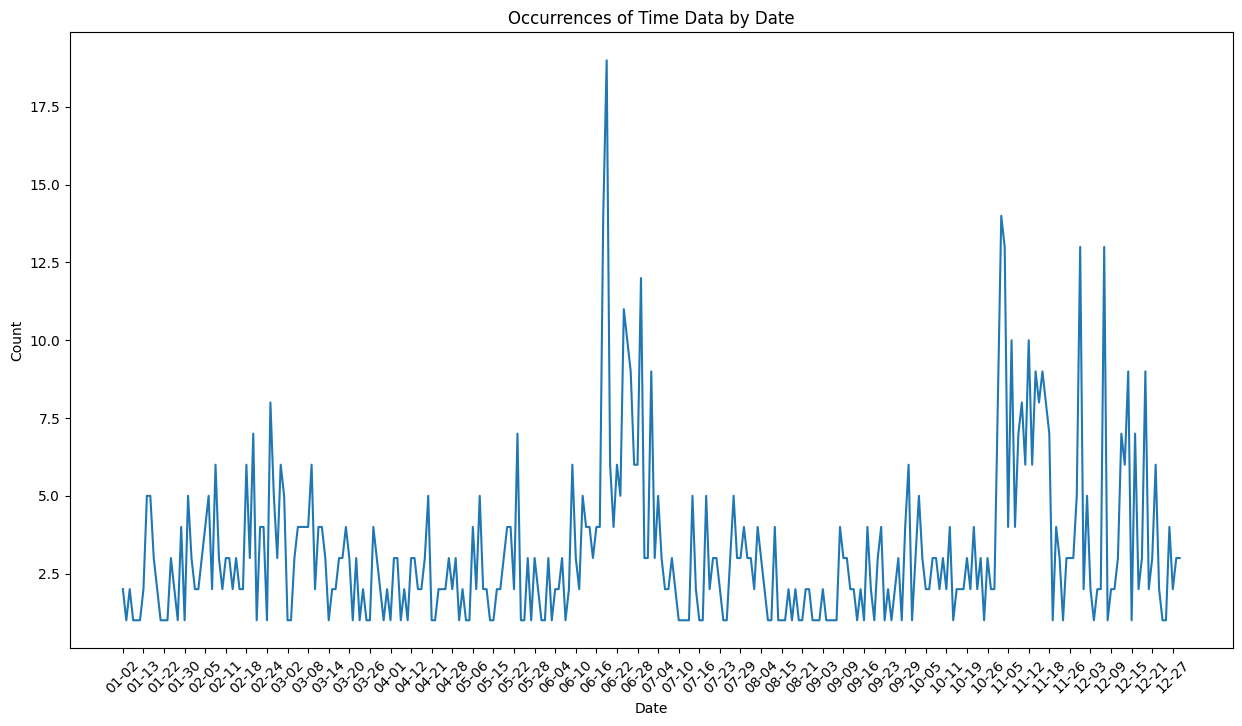

In [4]:
from datetime import datetime
# 将时间字符串转换为日期对象，并提取日期部分
dates = [datetime.strptime(time, "%Y-%m-%d %H:%M:%S").strftime("%m-%d") for time in m1]

# 统计每个日期的计数
daily_counts = {}
for date in dates:
    if date in daily_counts:
        daily_counts[date] += 1
    else:
        daily_counts[date] = 1

# 将日期和计数分别存储在两个列表中
date_list = list(daily_counts.keys())
count_list = list(daily_counts.values())

# 按日期进行排序
sorted_data = sorted(zip(date_list, count_list))

# 提取排序后的日期和计数列表
sorted_dates, sorted_counts = zip(*sorted_data)
plt.figure(figsize=(15,8))
# 绘制折线图
plt.plot(sorted_dates, sorted_counts)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Occurrences of Time Data by Date')

# 设置 x 轴刻度
plt.xticks(range(0, len(sorted_dates), 6), rotation=45)



In [5]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from collections import Counter

# 统计品牌出现的次数
brand_counts = Counter(m2)

# 提取品牌和对应的次数
brands = list(brand_counts.keys())
counts = list(brand_counts.values())

# 计算概率
total_count = sum(counts)
probabilities = [count / total_count for count in counts]

pie = (
    Pie(init_opts=opts.InitOpts(width="800px", height="500px"))
    .add(
        "购买比例",
        list(zip(brands, probabilities)),  # 将zip对象转换为列表
        radius=["40%", "70%"],
        rosetype="radius",
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同款式购买比例"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))  # 设置小数位数为两位
)


pie.render_notebook()


In [6]:
# 统计不同配置出现的次数
config_counts = Counter(m3)

# 提取配置和对应的次数
configs = list(config_counts.keys())
counts = list(config_counts.values())

# 计算概率
total_count = sum(counts)
probabilities = [count / total_count for count in counts]

# 创建饼图
pie = (
    Pie(init_opts=opts.InitOpts(width="800px", height="500px"))
    .add(
        "购买比例",
        list(zip(configs, probabilities)),  # 将zip对象转换为列表
        radius=["40%", "70%"],
        rosetype="radius",
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同配置购买比例"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))  # 设置小数位数为两位
)

pie.render_notebook()

没有配置，第二个饼图不用